In [5]:
from __future__ import division
import numpy as np
from io import StringIO
import io
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests

(225, 225, 3)


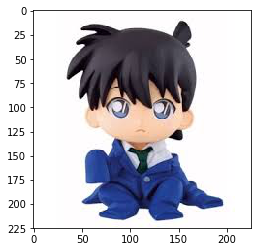

In [6]:
# get an image from the internet
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFVfYsGEv9cLnJ7yITfS8dctOetXqbSnhGavI-VHesq0oVozKXvA')

# Open the image and load it into an array. Need to use BytesIO to perform file like operations on a string.
img_arr = np.array(Image.open(io.BytesIO(response.content)))

plt.imshow(img_arr)#ploting the image
print(img_arr.shape) #Checking the shape of the image

In [7]:
gray = rgb2gray(img_arr) #Converting the rgb image to a grayscale image
print(gray.shape) #Checking the dimensions of the image

#loading the dimensions of the image in 2 variables
x=gray.shape[0] 
y=gray.shape[1]

(225, 225)


In [8]:
# Defining the kernels
# loading the blur Kernel
blur = np.ones((3, 3)) / 9

# loading the sharpen Kernel
sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# loading the edge detection Kernel
edgedetect = np.array([[-1,-1,-1],
                              [-1,8,-1],
                              [-1,-1,-1]])

# loading the edge detection Kernel
identity = np.array([[0,0,0],
                              [0,1,0],
                              [0,0,0]])


In [9]:
import tensorflow as tf

# Reshaping the kernels and the image in a 4D array.
img4d = gray.reshape(1, x, y, 1) # Batch=1 since we are convolving 1 images the x and y are the dimensions. 
                                 # 1 is the no. of in-channels

# filter height and width are 3, no. of in-channels= 1 , no. of out-channels = 1
sharpen_4d = sharpen.reshape(3, 3, 1, 1) 
blur_4d = blur.reshape(3, 3, 1, 1)
edgedetect_4d = edgedetect.reshape(3, 3, 1, 1)
identity_4d = identity.reshape(3, 3, 1, 1)
graph = tf.Graph()

with graph.as_default():
    #Create a tensorflow variable of the input image
    tf_input = tf.Variable(np.array(img4d, dtype = np.float32))
    
    #Create a tensorflow variable of the blur kernel
    tf_blur = tf.Variable(np.array(blur_4d, dtype = np.float32)) 
    
    #Create a tensorflow variable of the sharpen kernel
    tf_sharpen = tf.Variable(np.array(sharpen_4d, dtype = np.float32))
    
    #Create a tensorflow variable of the edge detect kernel
    tf_edgedetect = tf.Variable(np.array(edgedetect_4d, dtype = np.float32))
    
    #Create a tensorflow variable of the Identity kernel  
    tf_identity = tf.Variable(np.array(identity_4d, dtype = np.float32))
    
    #Performing Convolution. Command for convolution in tf is tf.nn.conv2d().
    #We are keeping the strides as 1 and also performing SAME covolutions.  
    tf_output1 = tf.nn.conv2d(tf_input, tf_sharpen, strides = [1, 1, 1, 1], padding = 'SAME')
    tf_output2 = tf.nn.conv2d(tf_input, tf_blur, strides = [1, 1, 1, 1], padding = 'SAME')
    tf_output3 = tf.nn.conv2d(tf_input, tf_edgedetect, strides = [1, 1, 1, 1], padding = 'SAME')
    tf_output4 = tf.nn.conv2d(tf_input, tf_identity, strides = [1, 1, 1, 1], padding = 'SAME')
    
    tf_output5 = tf.nn.atrous_conv2d(tf_input, tf_identity , rate = 1, padding= 'VALID')
    deconv = tf.nn.conv2d_transpose(tf_output4,tf_identity,output_shape =[1,x,y,1], strides = [1, 1, 1, 1],padding='SAME')

with tf.Session(graph = graph) as sess:
    tf.initialize_all_variables().run()
    final_image1 = tf_output1.eval() #evaluate the output value of tf_convolution_output1 in the graph.
    final_image1 = final_image1[0, :, :, 0] #We need to neglect the first and the last entry 
    
    final_image2 = tf_output2.eval() #evaluate the output value of tf_convolution_output2 in the graph.
    final_image2 = final_image2[0, :, :, 0] #We need to neglect the first and the last entry
    
    final_image3 = tf_output3.eval() #evaluate the output value of tf_convolution_output3 in the graph.
    final_image3 = final_image3[0, :, :, 0] #We need to neglect the first and the last entry
    
    final_image4 = tf_output4.eval() #evaluate the output value of tf_convolution_output4 in the graph.
    final_image4 = final_image4[0, :, :, 0] #We need to neglect the first and the last entry
    
    final_image5 = tf_output5.eval() #evaluate the output value of tf_convolution_output4 in the graph.
    final_image5 = final_image5[0, :, :, 0] #We need to neglect the first and the last entry
    
    final_image6 = deconv.eval() ##evaluate the output value of deconv in the graph.
    final_image6 = final_image6[0, :, :, 0]

Instructions for updating:
Use `tf.global_variables_initializer` instead.


(0.0, 1.0, 0.0, 1.0)

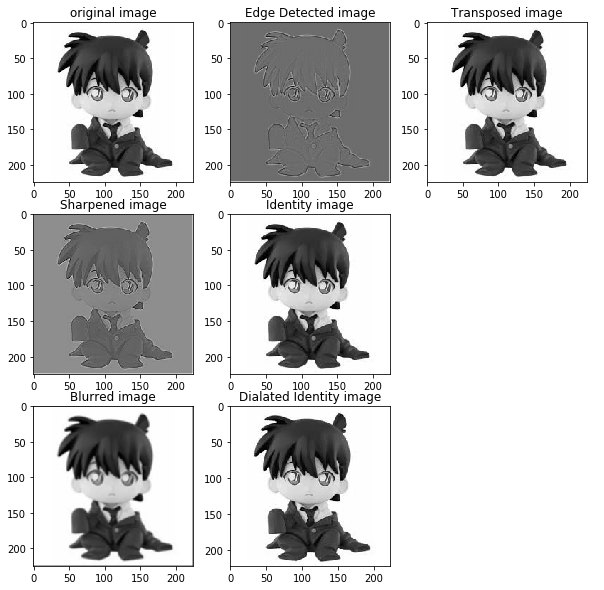

In [10]:
# setting the height & width of the plots and the number of plots 
f, ax_array = plt.subplots(3,3)
f.set_figheight(10)
f.set_figwidth(10)

ax_array[0,0].imshow(gray, cmap = plt.get_cmap('gray'))
ax_array[0,0].set_title('original image')

ax_array[1,0].imshow(final_image1, cmap = plt.get_cmap('gray'))
ax_array[1,0].set_title('Sharpened image')

ax_array[2,0].imshow(final_image2, cmap = plt.get_cmap('gray'))
ax_array[2,0].set_title('Blurred image')

ax_array[0,1].imshow(final_image3, cmap = plt.get_cmap('gray'))
ax_array[0,1].set_title('Edge Detected image')

ax_array[1,1].imshow(final_image4, cmap = plt.get_cmap('gray'))
ax_array[1,1].set_title('Identity image')

ax_array[2,1].imshow(final_image5, cmap = plt.get_cmap('gray'))
ax_array[2,1].set_title('Dialated Identity image')

ax_array[0,2].imshow(final_image6, cmap = plt.get_cmap('gray'))
ax_array[0,2].set_title('Transposed image')

ax_array[1,2].axis('off')
ax_array[2,2].axis('off')